In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from IPython.display import display, HTML


import pandas as pd
import numpy as np



data = pd.read_csv('all_stocks_5yr.csv')     


In [14]:
cl = data[data['Name'] =='MMM'].close

cv = cl.values
scl = MinMaxScaler()
cv = cv.reshape(cv.shape[0],1)
cv = scl.fit_transform(cv)

def processData(data,lb,gap) :
    X,Y = [],[]
    for i in range(len(data)-lb-gap-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb+gap),0])
    return np.array(X),np.array(Y)

X,y = processData(cv,7,7)

X_train, X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train, y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(995, 7) (249, 7)
(995,) (249,)


In [15]:
def create_model():
    model = Sequential()
    model.add(LSTM(256, input_shape=(7,1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model = create_model()
model.summary()

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],1))

history = model.fit(
    X_train,
    y_train,
    epochs=300,
    validation_data = (X_test, y_test),
    shuffle = False
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
32/32 [==============================] - 1s 28ms/step - loss: 0.0026 - val_loss: 0.0276
Epoch 2/300
32/32 [==============================] - 1s 16ms/step - loss: 0.0081 - val_loss: 0.0029
Epoch 3/300
32/32 [==============================] - 0s 15ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 4/300
32/32 [==============================] - 0s 15ms/step - loss: 9.3020e-04 - val_loss: 0.0027
Epoch 5/300
32/32 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 

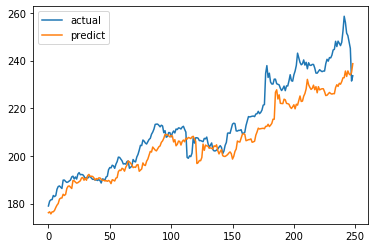

In [16]:
Xt = model.predict(X_test)

plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label = 'actual')
plt.plot(scl.inverse_transform(Xt), label='predict')
plt.legend()
plt.show()

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np 
from tensorflow.keras.utils import to_categorical

In [22]:
text = "경마장에 있는 말이 뛰고 있다., 그의 말이 법이다.,가는 말이 고와야 오는 말이 곱다"

t = Tokenizer()
print(text)
t.fit_on_texts([text])
vocab_size = len(t.word_index) + 1

print('단어 집합의 크기: %d' % vocab_size)
print(t.word_index)

경마장에 있는 말이 뛰고 있다., 그의 말이 법이다.,가는 말이 고와야 오는 말이 곱다
단어 집합의 크기: 12
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [24]:
sequences = list()
for line in text.split(',') :
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
        
print('학습에 사용할 샘플의 개수: %d' % len(sequences))

max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

학습에 사용할 샘플의 개수: 11
샘플의 최대 길이 : 6


In [25]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [46]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [47]:
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length = max_len-1))

model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 2.5105 - accuracy: 0.0000e+00
Epoch 2/200
1/1 - 0s - loss: 2.4961 - accuracy: 0.0000e+00
Epoch 3/200
1/1 - 0s - loss: 2.4819 - accuracy: 0.0909
Epoch 4/200
1/1 - 0s - loss: 2.4676 - accuracy: 0.1818
Epoch 5/200
1/1 - 0s - loss: 2.4532 - accuracy: 0.1818
Epoch 6/200
1/1 - 0s - loss: 2.4386 - accuracy: 0.3636
Epoch 7/200
1/1 - 0s - loss: 2.4236 - accuracy: 0.3636
Epoch 8/200
1/1 - 0s - loss: 2.4083 - accuracy: 0.3636
Epoch 9/200
1/1 - 0s - loss: 2.3924 - accuracy: 0.3636
Epoch 10/200
1/1 - 0s - loss: 2.3761 - accuracy: 0.3636
Epoch 11/200
1/1 - 0s - loss: 2.3591 - accuracy: 0.3636
Epoch 12/200
1/1 - 0s - loss: 2.3415 - accuracy: 0.3636
Epoch 13/200
1/1 - 0s - loss: 2.3233 - accuracy: 0.3636
Epoch 14/200
1/1 - 0s - loss: 2.3043 - accuracy: 0.3636
Epoch 15/200
1/1 - 0s - loss: 2.2846 - accuracy: 0.3636
Epoch 16/200
1/1 - 0s - loss: 2.2641 - accuracy: 0.3636
Epoch 17/200
1/1 - 0s - loss: 2.2429 - accuracy: 0.3636
Epoch 18/200
1/1 - 0s - loss: 2.2211 - accuracy: 

In [49]:
def sentence_generation(model, t, current_word, n):
    init_word = current_word
    sentence = ' '
    for _ in range(n):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        result = model.predict_classes(encoded, verbose = 0)
        for word, index in t.word_index.items():
            if index == result:
                break
        current_word = current_word + ' ' + word
        sentence = sentence + ' ' + word
    sentence = init_word + sentence
    return sentence

In [50]:
print(sentence_generation(model, t, '경마장에', 4))

print(sentence_generation(model, t, '그의', 2))

print(sentence_generation(model, t, '가는', 5))

경마장에  있는 말이 뛰고 있다
그의  말이 법이다
가는  말이 고와야 오는 말이 곱다
